In [17]:
def wSz(M):
    indeks = []
    d = M.distance_all_pairs()
    for u,v in M.edges(labels = false):
        blizu_u = 0
        for a in M.vertices():
            if d[a][u] < d[a][v]:
                blizu_u += 1
            blizu_v = order(M)- blizu_u
        indeks += [(M.degree(u) + M.degree(v)) * blizu_u * blizu_v]
    return sum(indeks)

In [2]:
from sage.graphs.connectivity import is_connected
def spremeni_graf(G):
    H = Graph(G)
    if random() < 0.5:
        i = 0
        while True:
            H.delete_edge(H.random_edge())
            if is_connected(H):
                H
                break
            else:
                H = Graph(G)
                i = i + 1
                True
            if i > order(G)*order(G)/2: #Št. poskusov odstranitve
                H.add_edge(H.complement().random_edge()) #Grafu H doda random povezavo, ki je še ni v grafu (izbira povezave iz komplementa grafa H)
                break
    else:
        if H.complement().size() == 0: #Če je število povezav v komplementu == 0
            H.delete_edge(H.random_edge()) # Grafu H zbriše random povezavo
        else:
            H.add_edge(H.complement().random_edge()) # Graf H doda povezavo, ki je še ni v grafu (izbira med povezavami v komplementu)
    #Naprej se hočemo znebiti ciklov!
    #M = Graph(H)
    #while True:
    #    M.delete_edge(M.random_edge())
    #    if is_connected(M):
    #        M
    #        break
    #    else:
    #        M = Graph(H)
    return M

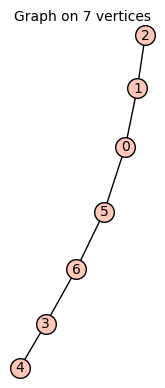

In [182]:
H = Graph([(0, 1), (1, 2),(0,3),(3,4),(0,5),(5,6)])
spremeni_graf(H)

In [18]:
def min_wSz_novo_vozlisce(G):
    # min wSz iščemo tako da dodamo vozlišče s povezavo na graf z min wSz!
    H = Graph(G)
    novo_vzl = order(H)
    H.add_edge((novo_vzl-1,novo_vzl,None))
    k = 0
    primerjajH = H
    HwSz = wSz(H)
    while k < novo_vzl*(novo_vzl+1):
        k = k + 1
        M = H
        M = spremeni_graf(M)
#        if M.diameter() <= 6:
        H = M
        MwSz = wSz(H)
        if MwSz < HwSz:
            primerjajH = H
            HwSz = MwSz
#            else:
#                globina = 1
#                while globina < novo_vzl*(novo_vzl+1)/k :
#                    globina = globina + 1
#                    H = spremeni_graf(H)
#                    if wSz(H) < wSz(primerjajH):
#                        primerjajH = H
    return primerjajH

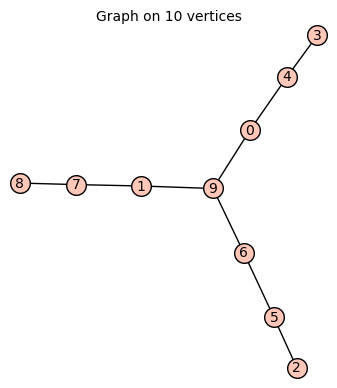

In [19]:
H7 = Graph([(0, 1), (1, 2),(0,3),(3,4),(0,5),(5,6)])
H8 = min_wSz_novo_vozlisce(H7)
H9 = min_wSz_novo_vozlisce(H8)
H10 = min_wSz_novo_vozlisce(H9)
H10

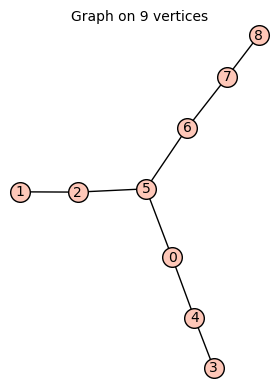

In [21]:
H9

In [26]:
def najdi_graf_z_min_wSz(G):
    i = 1
    najboljsiH = min_wSz_novo_vozlisce(G)
    HwSz = wSz(najboljsiH)
    while i < 40:
        i = i + 1
        H = min_wSz_novo_vozlisce(G)
        MwSz = wSz(H)
        if MwSz < HwSz:
            najboljsiH = H
            HwSz = MwSz
    return H

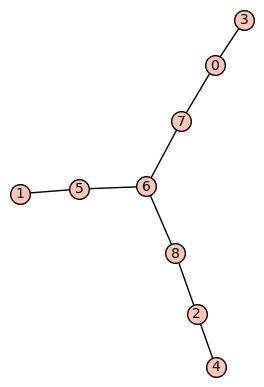

434

In [27]:
H9 = najdi_graf_z_min_wSz(H8)
H9.show()
wSz(H9)

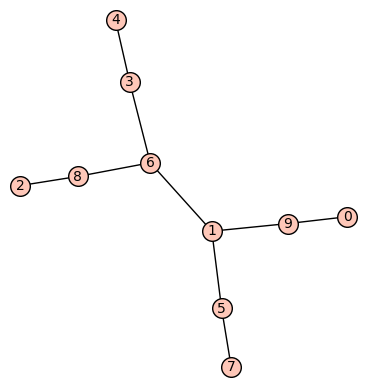

578

In [203]:
H10 = min_wSz_novo_vozlisce(H9)
H10.show()
wSz(H10)

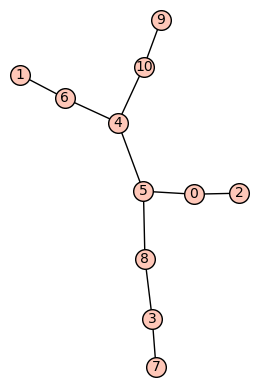

762

In [204]:
H11 = min_wSz_novo_vozlisce(H10)
H11.show()
wSz(H11)

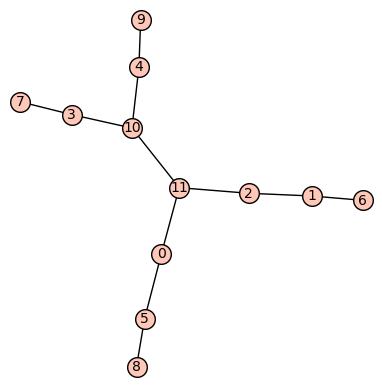

972

In [208]:
H12 = min_wSz_novo_vozlisce(H11)
H12.show()
wSz(H12)

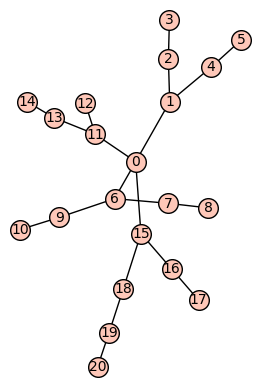

4288

In [209]:
H20 = Graph([(0, 1), (1, 2),(2,3),(1,4),(4,5),(0,6),(6,7),(7,8),(6,9),(9,10),(0,11),(11,12),(11,13),(13,14),(0,15),(15,16),(16,17),(15,18),(18,19)])
H21 = min_wSz_novo_vozlisce(H20)
H21.show()
wSz(H21)